**pandas data frames**

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

read file csv

In [2]:
read_data_file = pd.read_csv('..\project_flink.csv')

In [3]:
df = pd.DataFrame(read_data_file)

part of smell

In [4]:
commit_befor_sm = df.filter(regex='_befor')

In [5]:
commit_after_sm = df.filter(regex='_after')

In [6]:
group_befor_sm = df.filter(regex='_bf')

In [7]:
group_after_sm = df.filter(regex='_at')

In [8]:
#commit_after_sm.sum(axis=1)

In [9]:
df['commit_after'] = commit_after_sm.sum(axis=1)

In [10]:
commit_after = df['commit_after']

In [11]:
#commit_befor_sm.sum(axis=1)

In [12]:
df['commit_befor'] = commit_befor_sm.sum(axis=1)

In [13]:
df['commit_befor'] = commit_befor_sm.sum(axis=1)

In [14]:
commit_befor = df['commit_befor']

In [15]:
df['cal_smell']  = commit_after_sm.sum(axis=1) - commit_befor_sm.sum(axis=1)

In [16]:
cal_smell =  df['cal_smell']

columns list

In [17]:
#list(df.columns)

In [18]:
rule1_bf = df[['s6212_before' , 's1874_before' , 's1133_before' , 's1123_before' , 
            's1192_before' , 's106_before' , 's1155_before' , 's5411_before' ,
            's1172_before' , 's1141_before'  
             ]] 

In [19]:
rule1_at = df[['s6212_after' , 's1874_after' , 's1133_after' , 's1123_after' , 
            's1192_after' , 's106_after' , 's1155_after' , 's5411_after' ,
            's1172_after' , 's1141_after'  ]]

In [20]:
rule2_bf = df[['s119_before' , 's112_before' , 's3740_before' , 's1948_before' , 
            's1181_before' , 's5993_before' , 's3011_before' , 's1612_before' ,
            's2139_before' , 's1610_before'  , 's3358_before' ,
             ]] 

In [21]:
rule2_at = df[['s119_after' , 's112_after' , 's3740_after' , 's1948_after' , 
            's1181_after' , 's5993_after' , 's3011_after' , 's6212_after',
            's2139_after' , 's1610_after' ,  's3358_after' ,
            
            ]] 

In [22]:
rule3_bf = df[['s2293_before' , 's3776_before' , 's1199_before' , 's3358_before' ]] 

In [23]:
rule3_at = df[['s2293_after' , 's3776_after' , 's1199_after' , 's3358_after']] 

In [24]:
df['dispen_bf'] = rule1_bf.sum(axis=1)
df['object_bf'] = rule2_bf.sum(axis=1)
df['bloater_bf'] = rule3_bf.sum(axis=1)

In [25]:
df['dispen_at'] = rule1_at.sum(axis=1)
df['object_at'] = rule2_at.sum(axis=1)
df['bloater_at'] = rule3_at.sum(axis=1)

In [26]:
dispen_bf = df['dispen_bf']
object_bf = df['object_bf']
bloater_bf = df['bloater_bf']

dispen_at = df['dispen_at']
object_at = df['object_at']
bloater_at = df['bloater_at']

Set data type time  

In [27]:
data_time = df[{'open_time' , 'closed_time' }]

In [28]:
open_time = pd.to_datetime(df['open_time'])
closed_time = pd.to_datetime(df['closed_time'])

In [29]:
df['cla_time'] = pd.to_datetime(df['closed_time']) - pd.to_datetime(df['open_time'])

In [30]:
cal_time = df['cla_time']

In [31]:
cal_time.median()

Timedelta('17 days 02:22:30')

Information issus on GitHub 

In [32]:
data_file = df[{'changed_file' , 'additions'  , 'deletions' , 'Dev' }]

In [33]:
changed_file = df['changed_file']

In [34]:
additions = df['additions']

In [35]:
deletions = df['deletions']

In [36]:
Dev = df['Dev']

data frame containing information 

In [37]:
data_flink = pd.DataFrame({  'commit_befor ' : commit_befor , 'commit_after' : commit_after, 'cal_smell' : cal_smell , 
                              'dispen_bf' :dispen_bf , 'object_bf' : object_bf , 'bloater_bf':bloater_bf ,
                              'dispen_at' :dispen_at , 'object_at' : object_at , 'bloater_af': bloater_at ,
                              'open_time' : open_time , 'closed_time' : closed_time , 'cal_time' : cal_time,
                              'changed_file' : changed_file , 'additions' : additions , 'deletions': deletions , 'dev': Dev ,
                              
                            })

In [38]:
from datetime import timedelta

In [39]:
data_flink[data_flink['cal_time'] < timedelta (minutes = 0)]

,commit_befor,commit_after,cal_smell,dispen_bf,object_bf,bloater_bf,dispen_at,object_at,bloater_af,open_time,closed_time,cal_time,changed_file,additions,deletions,dev


In [40]:
data_flink['cal_time'].median()

Timedelta('17 days 02:22:30')

In [41]:
data_flink['cal_time_binaly'] = data_flink['cal_time'].apply(lambda x:  0 if x < timedelta (days = 17) else 1)

In [42]:
data_flink['open_time'] = pd.DatetimeIndex(data_flink['open_time']).month

In [43]:
data_flink['closed_time'] = pd.DatetimeIndex(data_flink['closed_time']).month

Model

In [44]:
df_drop_nan = data_flink.dropna()

In [45]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [46]:
X ,y = df_drop_nan.iloc[:, [ True , False,  False , True , True ,True , False , False , False ,True , False , False, False , False , False , False,False]] , df_drop_nan['cal_time_binaly']

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test = X[:20], X[20:]
y_train, y_test = y[:20], y[20:]
clf = GradientBoostingClassifier(n_estimators=1, learning_rate=1.0 , max_depth=1 , random_state=2).fit(X_train , y_train)

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cross_val_score(clf , X , y , cv=5 , scoring= "accuracy")

array([0.5       , 0.5       , 0.33333333, 0.66666667, 0.66666667])

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(clf,X,y,cv=5)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y , y_pred)

array([[12,  3],
       [11,  4]], dtype=int64)

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision = ', precision_score(y,y_pred ,average='macro'))
print('recall_score = ', recall_score(y,y_pred ,average='macro'))
print('f1_score',f1_score(y,y_pred ,average='macro'))


precision =  0.5465838509316769
recall_score =  0.5333333333333333
f1_score 0.4976076555023924


In [54]:
#sorted(clf.cv_results_.keys())

In [55]:
frame={"y":y,"y_pred": y_pred}
pd.DataFrame(frame).sum()

y         15
y_pred     7
dtype: int64

In [56]:
from sklearn.model_selection import GridSearchCV

parameters = {
  
    'learning_rate': [0.01 , 0.1 ,1],
    'n_estimators': [12,14,16],
    'subsample' : [0.7],
    'max_depth' : [2] ,
    'random_state':[2]
  
}
GradientBoosting = GradientBoostingClassifier()
clf = GridSearchCV(GradientBoosting, parameters , cv=3 , scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [2],
                         'n_estimators': [12, 14, 16], 'random_state': [2],
                         'subsample': [0.7]},
             scoring='f1_macro')

In [57]:
#sorted(clf.cv_results_.keys())

In [58]:
clf.best_estimator_

GradientBoostingClassifier(max_depth=2, n_estimators=12, random_state=2,
                           subsample=0.7)

In [59]:
clf.best_score_

0.48047138047138044

In [60]:
y_pred = cross_val_predict(clf.best_estimator_,X_test,y_test)
y_pred

C:\Users\Beauz\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [61]:
y_pred_clf = clf.best_estimator_.predict(X_test)

In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('precision = ', precision_score(y_test,y_pred_clf ,average='macro'))
print('recall_score = ', recall_score(y_test,y_pred_clf ,average='macro'))
print('f1_score',f1_score(y_test,y_pred_clf ,average='macro'))

precision =  0.15
recall_score =  0.5
f1_score 0.23076923076923075


C:\Users\Beauz\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
from matplotlib import pyplot as plt

In [64]:
from sklearn.metrics import roc_curve

fpr , tpr ,thresholds = roc_curve(y_test , y_pred_clf)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
    plt.grid(True)   

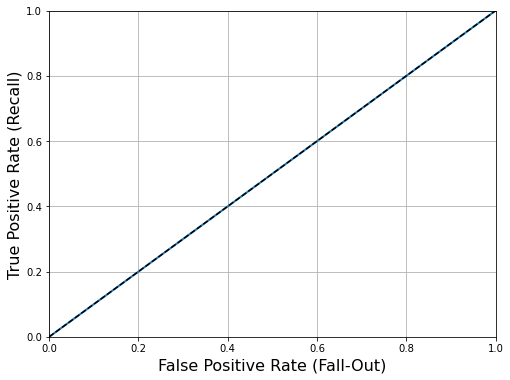

In [ ]:
plt.figure(figsize=(8,6))
plot_roc_curve(fpr , tpr, label=None) 
plt.show()

In [72]:
time = np.arange(1, 9)
train_accuracy = np.empty(len(time))
test_accuracy = np.empty(len(time))

In [73]:
for i , k in enumerate(time) :
    GB = GradientBoostingClassifier(k)
    GB.fit(X_train ,y_train)
    train_accuracy[i] = GB.score(X_train , y_train)
    test_accuracy[i] = GB.score(X_test, y_test)

C:\Users\Beauz\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass loss=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


ValueError: Unknown format code 's' for object of type 'int'